# N-Body Problem Example
This example demonstrates a more complex Hamiltonian system, the N-Body problem, using the `NBody` class from the file `hdynamics/dynamics/n_body.py`. The N-Body problem involves simulating the motion of multiple bodies under mutual gravitational attraction.

## N-Body Hamiltonian

One way the N-Body Hamiltonian is more complex than the simple harmonic oscillator is that it involves multiple bodies, and each has its own three-dimensional position and momentum vectors. We will use $(x_i, y_i, z_i)$ for the position coordinates and $(p_{x_i}, p_{y_i}, p_{z_i})$ for the momentum coordinates of the $i$-th body. 

We may define the kinetic energy of the system as:

$T(p) = \sum_{i=1}^{N} \frac{p_{x_i}^2 + p_{y_i}^2 + p_{z_i}^2}{2m_i}$

where $m_i$ is the mass of the $i$-th body.

We can define the gravitational potential energy between two bodies as:

$V(q) = -G \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} \frac{m_i m_j}{\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2}}$

where $G$ is the gravitational constant.

The Hamiltonian for the N-Body problem can then be expressed as:

$H(q, p) = T(p) + V(q)$

where $q$ is the vector of positions and $p$ is the vector of momenta for all bodies.

## The `NBody` Class

The `NBody` class in the `hdynamics/dynamics/n_body.py` file encapsulates the N-Body problem. It allows you to define the number of bodies, their masses, and the gravitational constant. The class provides methods to compute the Hamiltonian, generate trajectories, and visualize the motion of the bodies.

The constructor of the `NBody` class initializes the system with the number of dimensions the problem is to be solved in, the number of bodies, their masses, and the gravitational constant. Each body may have its own mass (in which case `masses` is an array) or the same mass (in which case `masses` is a scalar). Many of these parameters are optional, with default values provided. The constructor also calculates the instance variable `mass_outer_product` which is a 2D array, which at coordinates $(i, j)$ contains the product of the masses of the $i$-th and $j$-th bodies. This saves recomputing the mass products during the Hamiltonian calculations.

The Hamiltonian is computed in the method `H` based on the positions and momenta of all bodies. The phase space vector for $N$ bodies is passed in the value $x$ and has the form:

$
\left(x_1, y_1, z_1, x_2, y_2, z_2, \ldots, x_N, y_N, z_N, p_{x_1}, p_{y_1}, p_{z_1}, p_{x_2}, p_{y_2}, p_{z_2}, \ldots, p_{x_N}, p_{y_N}, p_{z_N}\right).
$

The Hamiltonian is computed. using several JAX operations to ensure efficient computation, including broadcasting and vectorized operations. This also reduces and simplifies the code, making it easier to read and maintain.

The Hamiltonian also includes a parameter `eps` which is a small value, the square of which is added to the denominator in the potential energy calculation to avoid division by zero. This is particularly useful when two bodies are very close together, as it prevents numerical instability.

The `plot_trajectory` method is currently defined to work only when two dimensions are used. It visualizes the trajectory of the bodies in a 2D plot, showing their positions over time using a line plot, with a different color for each body. The final positions of the bodies are marked with a dot.

## Example Simulation

In the following code blocks, we will define a three-body system with different masses and initial conditions, generate a trajectory, and visualize the motion of the bodies.

### Creating the N-Body System

To create an instance of the `NBody` class, we need to import it then create it. We specify a 2-dimensional system with three bodies and give them different masses. We don't set the gravitational constant, so it will use the default value of $G = 1.0$. This is not physically realistic, but it simplifies the example.

In [1]:
import jax.numpy as jnp

from hdynamics.dynamics.nbody import Nbody

nbody = Nbody(dim=2, n_bodies=3, masses=jnp.array([10.0, 2.0, 1.0]))

### Running the Simulation

Next, we define the initial conditions of the system. The first six entries represent the positions of the three bodies in 2D space, and the last six entries represent their momenta. 

We then generate a trajectory for the system over a specified time span. The positions and momenta of the bodies are stored in the `trajectory` variable, and the time points are stored in `t_span`. The trajectory is a 2D array where each row corresponds to a time point and each column corresponds to a position or momentum of a body.

In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

initial_conditions = jnp.array([1, 2, 0, 0, 0, -1, -0.1, 0.1, 0.1, -0.2, 0, 0.1])

trajectory, t_span = nbody.generate_trajectory(initial_conditions, 0.01, 2000)

print(f"Trajectory shape: {trajectory.shape}")
print("Trajectory:", trajectory)

print(f"Time span shape: {t_span.shape}")
print("Time span:", t_span)

Trajectory shape: (2001, 12)
Trajectory: [[ 1.0000000e+00  2.0000000e+00  0.0000000e+00 ... -2.0000000e-01
   0.0000000e+00  1.0000000e-01]
 [ 9.9988943e-01  2.0000775e+00  5.4455642e-04 ... -1.8408032e-01
   3.1639836e-03  1.2921949e-01]
 [ 9.9975765e-01  2.0001094e+00  1.1781018e-03 ... -1.6825616e-01
   6.3422727e-03  1.5853254e-01]
 ...
 [ 1.0535572e+00  1.8014780e+00 -3.2761618e-01 ... -3.0015228e+00
  -4.8184228e-01 -8.9709496e-01]
 [ 1.0560749e+00  1.8053695e+00 -3.3807236e-01 ... -2.9738660e+00
  -3.7165257e-01 -9.0934932e-01]
 [ 1.0584670e+00  1.8092443e+00 -3.4844953e-01 ... -2.9466505e+00
  -2.6258388e-01 -9.1992861e-01]]
Time span shape: (2001,)
Time span: [0.0000000e+00 1.0000001e-02 2.0000001e-02 ... 1.9980001e+01 1.9990002e+01
 2.0000000e+01]


### Plotting the Results

Finally, we visualize the trajectory of the bodies in a 2D plot. Each body is represented by a line showing its path over time, and the final positions are marked with dots.

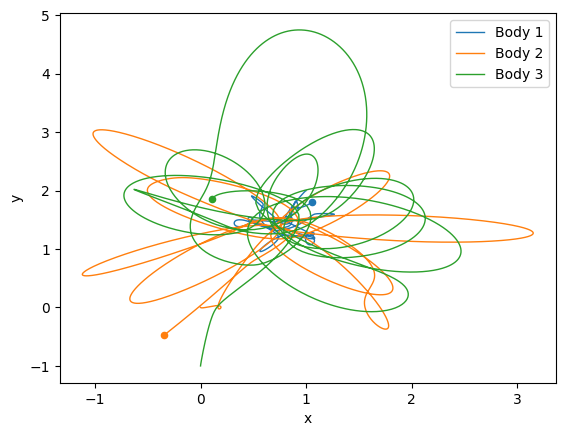

In [3]:
fig, ax = plt.subplots(1, 1)

nbody.plot_trajectory(trajectory, t_span, ax)

## Another Example

Th code below shows how to create a system with 10 bodies, each with random initial positions and momenta. The initial conditions are generated using JAX's random number generation capabilities, ensuring reproducibility by setting a random seed.

Try changing aspects of the system, such as the number of bodies, their masses, and the initial conditions to see how the dynamics change. You can also experiment with different time spans and step sizes for the trajectory generation. You should be able to observe that increasing the number of bodies significantly (try 100 bodies, for example) still leads to the system solving in a reasonably short time, thanks to the efficiency of JAX's vectorized operations.

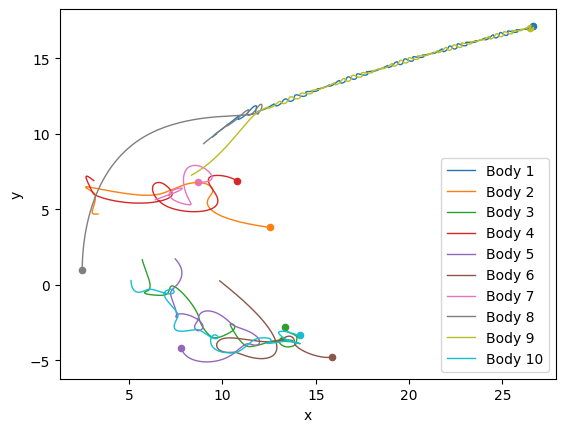

In [4]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from hdynamics.dynamics.nbody import Nbody

# Select the number of bodies
n_bodies = 10

# Create an instance of the Nbody class with the specified number of bodies
nbody = Nbody(dim=2, n_bodies=n_bodies)

# Create some random initial conditions
key = jax.random.PRNGKey(0)  
positions = jax.random.uniform(key, shape=(n_bodies * 2,), minval=0.0, maxval=10.0)
momenta = jax.random.uniform(key, shape=(n_bodies * 2,), minval=-1.0, maxval=1.0)
initial_conditions = jnp.concatenate((positions, momenta))

# Simulate the trajectory
trajectory, t_span = nbody.generate_trajectory(initial_conditions, 0.01, 2000)

# Plot the trajectory
fig, ax = plt.subplots(1, 1)
nbody.plot_trajectory(trajectory, t_span, ax)